## Load Data from CSVs

In [381]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('../CSVs/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [382]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('../CSVs/daily_engagement.csv','rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [383]:
with open('../CSVs/project_submissions.csv','rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Fixing Data Types

In [384]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

# Conclusion : When we read a csv as a dictionary then all the key-value pairs are strings so they need to be converted
#              into adequate data types for efficient processing.

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [385]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [386]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [387]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
print("Length of Enrollments : ",str(len(enrollments)))
print("Length of Engagements : ",str(len(daily_engagement)))
print("Length of Submissions : ",str(len(project_submissions)))

unique_enrollments = set()
unique_engagements = set()
unique_submissions = set()

for enrollment,engagement,submission in zip(enrollments,daily_engagement,project_submissions):
    unique_enrollments.add(enrollment['account_key'])
    unique_engagements.add(engagement['acct'])
    unique_submissions.add(submission['account_key'])
    
print("-----------------------------------------------------------------------")

print("Length of Unique Enrollments : ",str(len(enrollments)))
print("Length of Unique Engagements : ",str(len(daily_engagement)))
print("Length of Unique Submissions : ",str(len(project_submissions)))

# This is done to check whether there is any duplicate data that can cause issues in processing

Length of Enrollments :  1640
Length of Engagements :  136240
Length of Submissions :  3642
-----------------------------------------------------------------------
Length of Unique Enrollments :  1640
Length of Unique Engagements :  136240
Length of Unique Submissions :  3642


## Problems in the Data

In [388]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

## Missing Engagement Records

In [389]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    enrolled_student = enrollment['account_key']
    if enrolled_student not in unique_engagements:
        print(enrollment)
        break
        
# There can be students that enrolled in a course but did'nt engage/work on it
# One of the case can be that student enrolled and de-enrolled on same day

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


## Checking for More Problem Records

In [390]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagements and 
            enrollment['join_date'] != enrollment['cancel_date']):
        #print(enrollment)
        num_problem_students += 1

num_problem_students

1536

## Tracking Down the Remaining Problems

In [391]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [392]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [393]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [394]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
# The evaluation of OR keyword takes place using lazy evaluation i.e., only if the first statement is false, 
# the compiler would check the second one
# Here, what we are trying to do is that a student can enroll and engage multiple times so we need to have the 
# latest engagement records or latest enrollment

        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
            
len(paid_students)

# Note that if you switch the order of the second if statement like so
# if (enrollment_date > paid_students[account_key] or 
# account_key not in paid_students)
# Reason : Lazy Evaluation

995

## Getting Data from First Week

In [395]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

# After Debuuging, actual code should be :
# def within_one_week(join_date, engagement_date):
#     time_delta = engagement_date - join_date
#     return time_delta.days >= 0 and time_delta.days < 7

In [396]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [397]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

21508

## Exploring Student Engagement

In [398]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    
# Here, we have used default dictionary so that we can give default value to 'value' of dictionary 
# In this case, we have give list as default value, so it would expect a list to be passed as value for a particular
# key, otherwise it will return empty list if that record is not present.

In [399]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [400]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
# In Py3, adict.values() returns a dict_values object, not a list
# numpy functions expect numpy arrays or lists (of lists) so we need to cast dict.values()
print('Mean:',np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 647.590173826
Standard deviation: 1129.27121042
Minimum: 0.0
Maximum: 10568.1008673


## Debugging Data Analysis Code

In [401]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

10568.100867332541

In [402]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 1, 7, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 50.9938951667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 8, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 688.3034385), ('lessons_completed', 5), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 427.691757667), ('lessons_completed', 1), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 165.6270925), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('pr

## Lessons Completed in First Week

In [403]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

In [404]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

In [405]:
import numpy as np

def describe_data(data):
    data = list(data)
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

describe_data(total_minutes_by_account.values())

Mean: 647.590173826
Standard deviation: 1129.27121042
Minimum: 0.0
Maximum: 10568.1008673


In [406]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 3.09246231156
Standard deviation: 5.36276886663
Minimum: 0
Maximum: 43


## Number of Visits in First Week

In [407]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')
describe_data(days_visited_by_account.values())

Mean: 6.89648241206
Standard deviation: 11.8743986968
Minimum: 0
Maximum: 80


## Splitting out Passing Students

In [408]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

647

In [409]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

15231
6277


## Comparing the Two Student Groups

In [410]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print('non-passing students:')
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print('passing students:')
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print('non-passing students:')
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print('passing students:')
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print('non-passing students:')
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print('passing students:')
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

non-passing students:
Mean: 260.34690916
Standard deviation: 531.663374075
Minimum: 0.0
Maximum: 4961.78916967
passing students:
Mean: 855.875577387
Standard deviation: 1298.11158586
Minimum: 0.0
Maximum: 10568.1008673
non-passing students:
Mean: 1.3591954023
Standard deviation: 3.52254666184
Minimum: 0
Maximum: 29
passing students:
Mean: 4.02472952087
Standard deviation: 5.92190342949
Minimum: 0
Maximum: 43
non-passing students:
Mean: 3.51149425287
Standard deviation: 5.40831469888
Minimum: 0
Maximum: 36
passing students:
Mean: 8.7171561051
Standard deviation: 13.8430839431
Minimum: 0
Maximum: 80


## Making Histograms

In [411]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

# %pylab inline so that graphs appear on the same page 

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    data = list(data)
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)

## Improving Plots and Sharing Findings

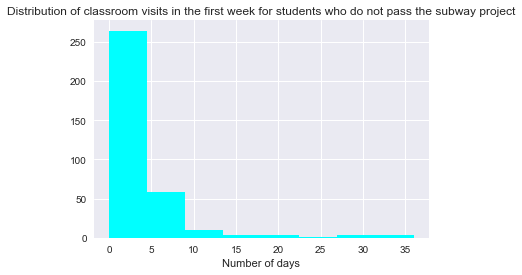

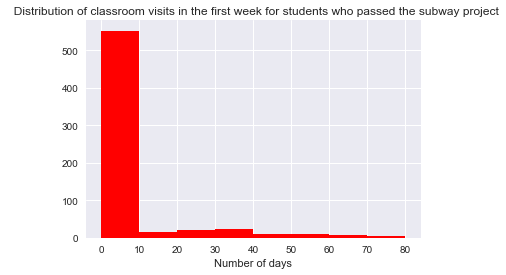

In [412]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
plt.hist(list(non_passing_visits.values()), bins=8,color='aqua')
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 'for students who do not pass the subway project')
plt.show()

plt.hist(list(passing_visits.values()), bins=8,color='red')
plt.xlabel('Number of days')
plt.title('  Distribution of classroom visits in the first week ' + 'for students who passed the subway project')
plt.show()